In [374]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from time import strptime, strftime
import seaborn as sns
raw = pd.read_csv('ZD2.csv')

In [375]:
raw.head()

,Ticket Id,Ticket Subject,Unnamed: 2,Device Serial ID (NA if not applicable),Terminal Release Build #,Release Build ID [3 digits] (NA if not applicable),Model,Maverick,Jazinda,Unnamed: 9,Date (Ticket Created),Ticket Type
0,103401,05/19/2019 Receipt missing items breakdown,05/19/2019 receipt missing items breakdown,P61SWD044HS015511,p61-merchant-280-RC2,280,P61,NaN,NaN,RC2,5/21/19,Incident
1,105110,10 ways you're overpaying for telecommunications,10 ways you're overpaying for telecommunications,NaN,NaN,-,NaN,NaN,NaN,NaN,5/31/19,Task
2,105968,1st National Bankcard,1st national bankcard,-,NaN,-,NaN,NaN,NaN,NaN,6/5/19,NaN
3,106811,2 critical problems - poynt backend issue with...,2 critical problems - poynt backend issue with...,-,NaN,-,NaN,NaN,NaN,NaN,6/10/19,Task
4,104385,2 Smart Terminal Dev Kit (Wi-Fi only),2 smart terminal dev kit (wi-fi only),-,NaN,-,NaN,NaN,NaN,NaN,5/28/19,NaN


In [376]:
df = raw.loc[:,['Ticket Id','Ticket Subject','Device Serial ID (NA if not applicable)','Date (Ticket Created)']]
df.rename(columns={'Ticket Id':'ID','Ticket Subject':
                   'Subject','Device Serial ID (NA if not applicable)':'Serial','Date (Ticket Created)':'Created'}, inplace=True)
df['Subject']= df['Subject'].str.lower()

In [377]:
df['Created']= pd.to_datetime(df['Created'], errors='coerce')
df['Week_Number'] = df['Created'].dt.week
count_row = df.shape[0]

In [378]:
a=df["Subject"]
keywords = ['timingout','stuck','freez','Settl','settlement','fail','respond','reader','card',
       'app','install','store','print','receipt','light','missing','invalid','refund','refund',
       'decline','void','manualentry','process','accept','3g','connect',
       'network','activat','first','updat','boot','shut','restart','touch','screen','respons']
def word(a):
    for i in keywords:
        if i in a:
            return i
    return "others"
df["Hotwords"] = df.Subject.apply(lambda x: word(x))

In [379]:
#df.set_index(["Hotwords", "Week_Number"]).count(level="Hotwords")
#df.groupby(["Hotwords"])["Week_Number"].count()

In [380]:
#df.groupby(['Week_Number', 'Hotwords'])['Week_Number'].count()
#DataFrame({'count' : df1.groupby( [ "Name", "City"] ).size()}).reset_index()
#dftest1  = dt({'count' : df.groupby( ['Week_Number', 'Hotwords'] ).size()}).reset_index()
#dftest1

In [381]:
#others = df['Hotwords']=='others'
#others = df.loc[df['Week_Number'] == 14]
#others.head()

In [382]:
#df.set_index('ID')
#df['Hotwords'].value_counts().plot()
#df = df['Hotwords']!='others'
#df

In [383]:
#group_name = df.groupby(['Week_Number', 'Hotwords'])
#group_name = group_name.size().unstack().sort_index()
#group_name_all = group_name.set_index(['Hotwords']).sort_index()
#all_names_index = all_names.set_index(['Sex','Name','Year']).sort_index()


In [384]:
pandas.crosstab(df['Week_Number'], df['Hotwords'])

Hotwords,3g,accept,activat,app,boot,card,connect,decline,fail,first,...,respons,restart,screen,settlement,shut,store,stuck,touch,updat,void
Week_Number,,,,,,,,,,,,,,,,,,,,,
11,0,1,0,4,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12,6,1,15,71,7,33,47,8,2,1,...,2,1,14,14,0,2,13,1,23,1
13,2,1,18,76,3,31,27,3,3,1,...,3,0,3,13,0,5,7,0,20,4
14,3,1,17,93,3,26,22,6,2,1,...,1,0,8,14,1,3,4,0,20,4
15,6,2,11,52,1,28,20,3,3,0,...,0,2,12,10,2,3,1,1,17,8
16,2,2,21,49,3,18,17,4,6,2,...,4,0,7,8,0,3,7,1,25,4
17,1,1,15,49,2,17,17,6,8,0,...,0,0,9,12,1,0,17,2,19,6
18,11,1,23,68,3,33,26,2,7,2,...,0,0,11,10,4,3,11,1,21,1
19,7,3,17,71,0,30,20,8,3,0,...,3,0,6,16,3,4,15,1,19,8


In [385]:
dftest = df.groupby("Week_Number").Hotwords.value_counts().to_frame('counts')
dftest
#value_counts.rename_axis('unique_values').reset_index(name='counts')


counts
Week_Number Hotwords          
11          others          23
            app              4
            print            3
            card             2
            reader           2
            receipt          2
            accept           1
            network          1
            process          1
            updat            1
            void             1
12          others         367
            app             71
            connect         47
            card            33
            print           33
            reader          31
            updat           23
            process         16
            activat         15
            screen          14
            settlement      14
            stuck           13
            decline          8
            boot             7
            3g               6
            receipt          5
            refund           5
            freez            4
            install          4
...                        ...
23          store            2
            invalid          1
            respons          1
            touch            1
24          others         377
            app             82
            settlement      36
            connect         26
            card            20
            process         19
            print           17
            refund          17
            activat         14
            stuck           12
            reader          11
            updat           11
            screen          10
            void            10
            receipt          6
            network          5
            store            5
            3g               4
            fail             3
            light            3
            accept           2
            decline          2
            freez            2
            missing          2
            invalid          1
            shut             1

[380 rows x 1 columns]

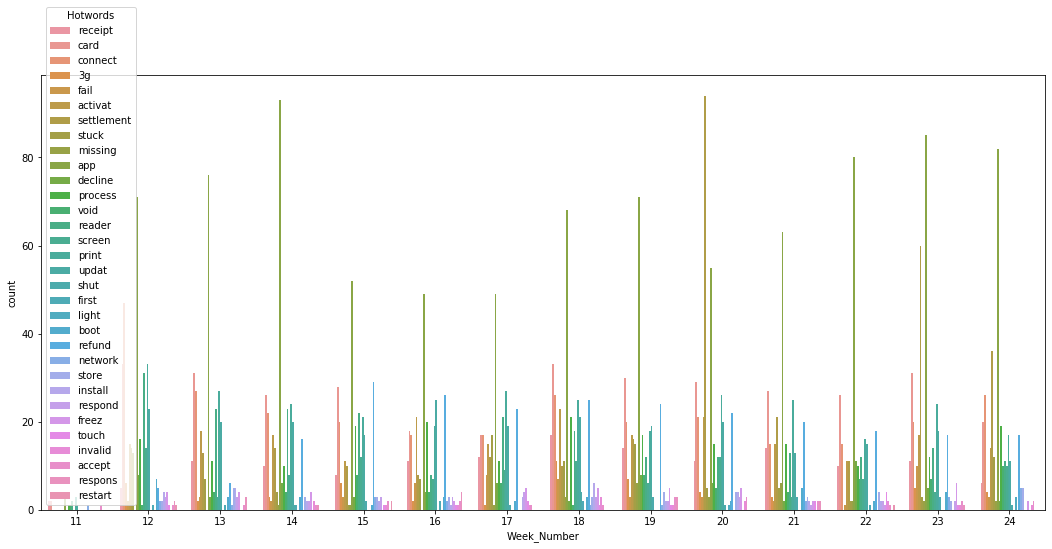

In [386]:
plt.figure(figsize = (18, 8))
df = df.loc[df['Hotwords'] != 'others']
ax = sns.countplot(x="Week_Number", hue='Hotwords', data=df)


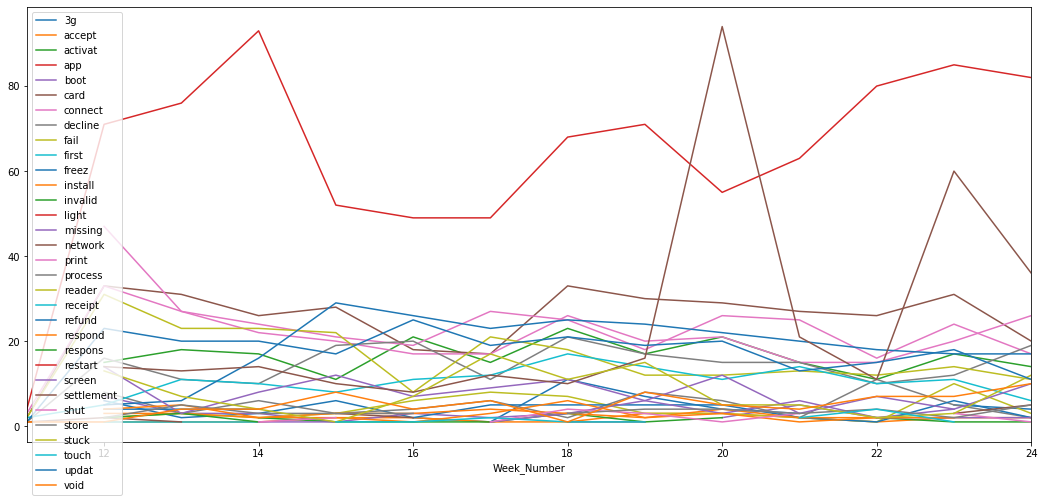

In [387]:
fig, ax = plt.subplots(figsize=(18,8))
df.groupby(['Week_Number','Hotwords']).count()['ID'].unstack().plot(ax=ax)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
df.groupby(['Week_Number','Hotwords']).count()['ID'].unstack().plot(ax=ax)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()